            Position  Career Stage Level  Annual Bonus  Years of Experience
0   Business Analyst                   1         45000             2.496714
1  Junior Consultant                   2         50000             3.861736
2  Senior Consultant                   3         60000             6.647689
3            Manager                   4         80000             9.523030
4    Country Manager                   5        110000             9.765847
Polynomial Regression (Degree 3) CV RMSE: 252840.21
Polynomial Regression (Degree 3) Training R2: 1.0000


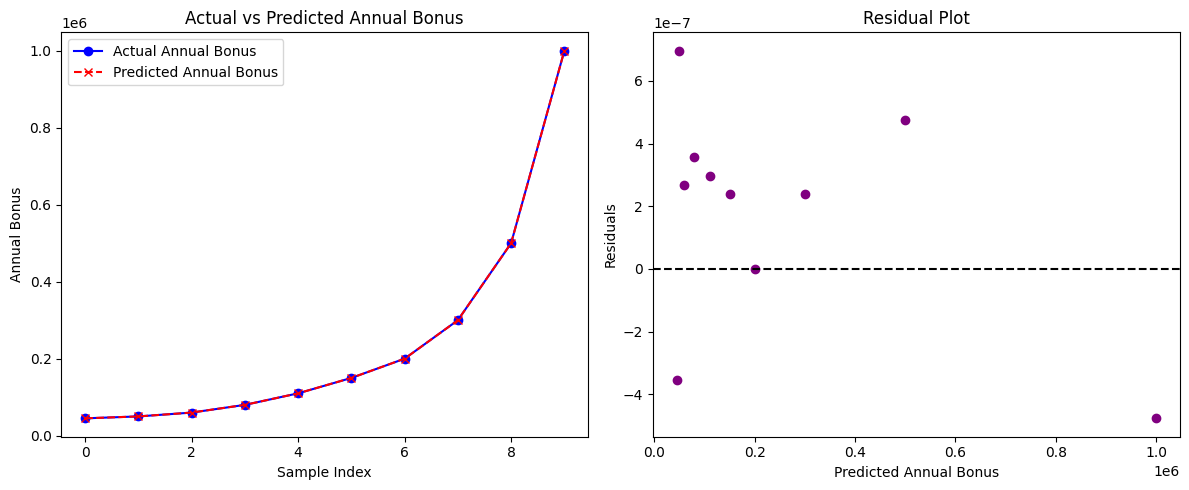

In [1]:
#Import Libraries and Load Dataset with Renamed Columns and Synthetic Feature
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data_set = pd.read_csv('/kaggle/input/salary/Position_Salaries.csv')

# Rename columns for novelty
data_set.rename(columns={'Level': 'Career Stage Level', 'Salary': 'Annual Bonus'}, inplace=True)

# Create synthetic feature: Years of Experience (Career Stage Level * 2 + noise)
np.random.seed(42)
data_set['Years of Experience'] = data_set['Career Stage Level'] * 2 + np.random.normal(0, 1, len(data_set))

print(data_set.head())


# Prepare Feature Matrix X and Target Vector y
X = data_set[['Career Stage Level', 'Years of Experience']].values
y = data_set['Annual Bonus'].values


# Polynomial Regression (Degree 3) with Cross-Validation Evaluation
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()

# Cross-validation RMSE (neg_root_mean_squared_error returns negative values, so negate to get RMSE)
cv_rmse_scores = cross_val_score(lin_reg, X_poly, y, scoring='neg_root_mean_squared_error', cv=5)
mean_cv_rmse = -cv_rmse_scores.mean()
print(f"Polynomial Regression (Degree 3) CV RMSE: {mean_cv_rmse:.2f}")

# Fit on whole dataset for visualization and training score
lin_reg.fit(X_poly, y)
y_pred = lin_reg.predict(X_poly)

# Calculate R2 score on training data
train_r2 = r2_score(y, y_pred)
print(f"Polynomial Regression (Degree 3) Training R2: {train_r2:.4f}")


# Visualization - Actual vs Predicted and Residual Plot

plt.figure(figsize=(12, 5))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.plot(range(len(y)), y, color='blue', marker='o', linestyle='-', label='Actual Annual Bonus')
plt.plot(range(len(y_pred)), y_pred, color='red', marker='x', linestyle='--', label='Predicted Annual Bonus')
plt.title('Actual vs Predicted Annual Bonus')
plt.xlabel('Sample Index')
plt.ylabel('Annual Bonus')
plt.legend()



# Residual plot
plt.subplot(1, 2, 2)
residuals = y - y_pred
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Annual Bonus')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()